<a href="https://colab.research.google.com/github/Ajlackey8/sales_predictions/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Projects/sales_predictions.csv')

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

In [35]:
df.shape

#8523 rows
#12 columns

(8523, 12)

2) What are the datatypes of each variable?

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) Are there duplicates? If so, drop any duplicates.

In [37]:
df.duplicated().sum()

#there are no duplicates

0

4) Identify missing values.

In [38]:
df.isna().sum()

#There are 1463 missing weights and 2410 missing sizes

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

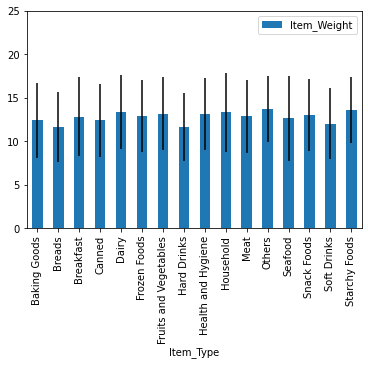

In [98]:
# Initially I thought a decent way of predicting the weight of an item would be to apply the average weight of items within it's category. For instance I assumed that most breads would exist in a certain rough weight zone, and most canned goods would exist in another.
# So that filling in missing weights with the average weight of their type would give a satisfactory guess at their weight. However, all categories appear to have nearly the same weight and also nearly the same standard deviation around their mean. So i'm guessing these weight data are randomly generated
df.groupby('Item_Type').describe()
stdweight = df.groupby('Item_Type').std()['Item_Weight']
df.groupby('Item_Type').mean().plot(y='Item_Weight',kind='bar', ylim=(0,25), yerr=stdweight)

# Whether this is makes the weight highly meaningful or meaningless I suppose depends largely on the question being asked.

# df.groupby('Outlet_Size').plot(x='Item_Outlet_Sales',y='Item_Weight', kind='scatter')

#There appears to be no meaningful relationship between weight and sales (even accounting for store size, as smaller supermarkets might struggle with larger heavier goods potentially), so I guess weight only really has relevance for difficulty of shipping/stocking?
#Lets see if theres a pattern correlation between weight and anything else.

# df.plot(x='Item_Weight',y='Item_MRP',kind='scatter')
# df.plot(x='Item_Weight',y='Item_Visibility',kind='scatter')

#I see no correlations with weight and all categories have similar weights so despite being a significant chunk of our data, I think it'll be fine to fill in an average.

mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)

In [133]:
#Moving onto Outlet size
#We have 4 columns that are almost certainly correlated so I think this will be another good fill opportunity.

df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'], dropna=False).count()

#We can now tell that there are only 2 types of stores getting Nan. Tier 3 Grocery stores (555) and Tier 2 Supermarket Type 1s
#I'm guessing there is a correlation between size and sales volume so we could look at that (larger stores on average are going to need to move more goods to keep the lights on so will serve higher traffic areas)
#It's more worth than I'm willing to do right now to normalize the sales volume against the number of instances so that the differing amounts of store sizes doesn't shift the graph. Though thats probably the best approach to determining the "size" it should be assigned.
#i'd also need to replace the values in a new dataframe with interger representations to plot correctly, so instead i'm just going to use my GUT like all data scientists shouldn't do when they get lazy.

df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'], dropna=False).mean()

# Since it appears that 2 distinct store types just didnt have their size logged. There is a clear trend where higher "tier" stores are larger in size. With Tier 3 only being Nan, medium and high and tier 1 grocery stores being small. So I think its a safe bet to fill medium in
# for tier 3 grocery store. As well as Tier 2 supermarket being small/nan it is fairly clear it should also be medium. As if it was going to be high, tier 2 "small" likely would have been medium. The jump from small to high in the same tier would be odd.
# in other words I think all the current Nan values for Outlet_Size can be reasonably estimated to be "Medium"


df['Outlet_Size'].fillna('Medium', inplace=True)

6) Confirm that there are no missing values after addressing them.

In [134]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [140]:
df.info()
df['Item_Identifier'].value_counts() #These are item IDs so aside from a case issue this should be fine
df['Item_Fat_Content'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [141]:
df['Item_Fat_Content'].replace({
    'LF':'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}, inplace=True)
df['Item_Fat_Content'].value_counts() #fixed Fat Content

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [143]:
df['Item_Type'].value_counts() #fine
df['Outlet_Identifier'].value_counts() #fine
#the other three outlet types are fine we just used them so I would have seen.

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [146]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
